# Feature Engineering 
## Titanic Dataset

### Missing Value Treatment
[Data Imputation](#airplane)

## Numeric Feature Engineering Techniques
[Binarization](#airplane)

[Binning](#airplane)

[Quantile Binning](#airplane)
    
### Power Transformations
[Log Transformation](#airplane)

[Box Cox Transformation](#airplane)

### Feature Scaling 
[Min-Max Scaling (Normalization)](#airplane)

[Standardization](#airplane)

## Categorical Feature Engineering Techniques
[Label Encoding](#airplane)

[One Hot Encoding](#airplane)

In [3]:
# manipulating dataframes
import pandas as pd
import numpy as np

# visualizing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Titanic Dataset
***

In [4]:
titanic = pd.read_csv('E:/KaggleDataSet/Titanic/all/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 891 Rows and 12 Columns
titanic.shape

(891, 12)

## Explore and Visualize Dataset
***

**Examine data types**

In [11]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

**Examine basic summary statistics**

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Examine plots to identify any patterns or insights**

In [ ]:
titanic.hist(figsize=(10,10))

### extract New Feature 

In [7]:
def title(x):
    if 'Mr.' in x:
        return 'Mr'
    elif 'Mrs.' in x:
        return 'Mrs'
    elif 'Master' in x:
        return 'Master'
    elif 'Miss.' in x:
        return 'Miss'
    else:
        return 'Other'

In [9]:
# feature for the title of each person
titanic['Title'] = titanic['Name'].apply(title)

titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

### Examine New DataFrame with new feature title 

In [13]:
# We added in 1 new features
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [14]:
titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Title          0.000000
dtype: float64

# Imputing Missing Values
***

Missing Values in dataset:
- age (~20% missing)
- cabin (~77% missing)
- embarked (0.2% missing)

In [ ]:
titanic.isnull().sum() / len(titanic)

### Data Imputation (1): Age

#### How do we impute age?

How should we impute the missing age of the passengers? Do we use the mean? or the median?

Would the **mean** be a realistic approach to apply to **every** passenger on the Titanic?

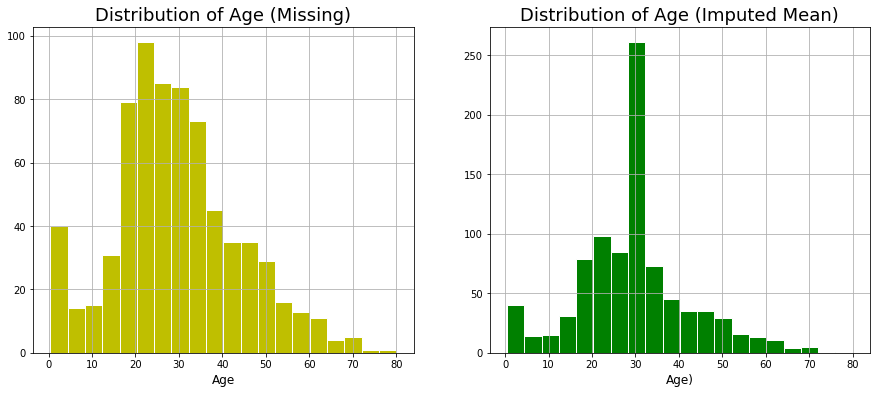

In [15]:
# Plot Distribution of Age (Missing)
plt.subplot(1, 2, 1)
titanic['Age'].hist(bins=20, figsize=(15,6), edgecolor='white', color='y')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Missing)', fontsize=18)

# Plot Distribution of Age (Imputed Mean)
plt.subplot(1, 2, 2)
mean_age = pd.DataFrame(titanic['Age'].fillna(titanic.Age.mean()))
mean_age['Age'].hist(bins=20, figsize=(15,6), edgecolor='white', color='g')
plt.xlabel('Age)', fontsize=12)
plt.title('Distribution of Age (Imputed Mean)', fontsize=18)

plt.show()

### Better Data Imputation: Age by Passenger Title

In [16]:
titanic.groupby(['Title'])['Age'].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Other     44.5
Name: Age, dtype: float64

**Missing Age Imputation**: The "Title" of each passenger tells a more realistic story on how we can impute their missing age.

Text(0, 0.5, 'Age')

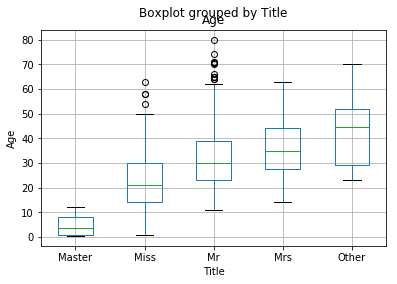

In [17]:
titanic.boxplot(column='Age',by='Title') #Mean Age is different per title
plt.ylabel('Age')

In [19]:
# Fill in the missing age with the median of their Titles
titanic['Age'].fillna(titanic.groupby(["Title"])["Age"].transform(np.median),inplace=True)

**Plot the Age Distribution Again**

Text(0.5, 1.0, 'Distribution of Age (Imputed by Title)')

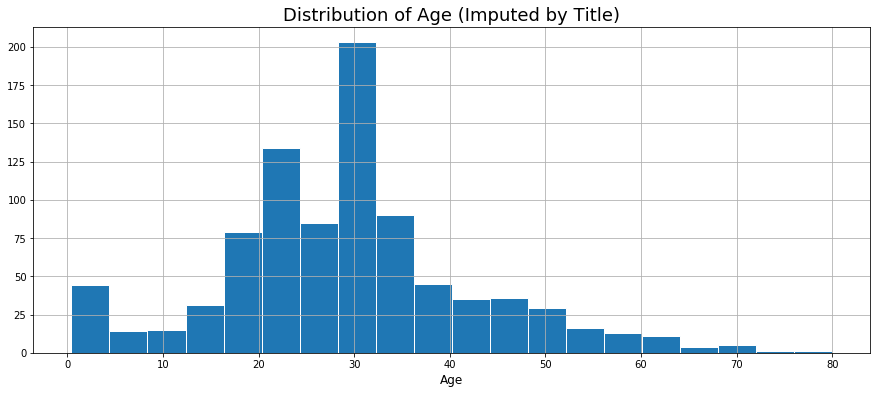

In [20]:
titanic['Age'].hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Imputed by Title)', fontsize=18)

### Data Imputation (2): Embarked

We have two missing values for Embarked. Let's impute it with the most occuring embarked station (S)

In [ ]:
titanic.Embarked.value_counts() 

**Impute missing 'Embarked' variable with the most frequent value: (S)**

In [23]:
# Approach 1:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])

# Approach 2:
# titanic['Embarked'] = titanic['Embarked'].fillna('S')

### Data Imputation (3): Cabin

**77% missing values from Cabin**

In [21]:
titanic.Cabin.isnull().sum() / len(titanic)

0.7710437710437711

**Drop Cabin Feature**

**WARNING:** Before you drop any feature, make sure you:
1. Check if there is a strong indicator between the target and missing feature
2. Check if the feature is relevant to the dataset
3. Check if the feature is not junk

**Always ask yourself:** 
1. Why is the feature missing?
2. How is the feature missing?
3. Is a missing feature an information we can capture?

In [ ]:
titanic.drop(columns=['Cabin'], inplace=True)

## Numeric Feature Engineering Techniques

**There are a lot of different types of numerical data, example:**
- counts
- price
- percentages
- measurements

**Numeric Features are about:**
- Scale: the range of values
- Distribution: the probability of taking on a particular value


**Remember:**

In machine learning, all data eventually boils down to numeric features. 

## Interaction Features
***

Interaction features may be generated for free in tree-based models (e.g. based on tree splits of your data)

Linear Models, on the other hand, need explicit creation of these interaction features. 


**There's a lot of single passengers...**

In [ ]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.FamilySize.value_counts()

**Examine distribution of passenger family size**: Notice how there's A LOT of single riders.

In [ ]:
titanic.FamilySize.hist()
plt.title('FamilySize Distribution for Titanic Passengers', size=15)
plt.xlabel("Family Size")
plt.ylabel('Frequency')

## Dealing with Counts
***
### a. Binarization
Raw family size may not be a **robust** measurement. 

With domain knowledge, we can say that passengers are broken up into two family sizes: 
1. Traveling Alone 
2. Traveling with Family

**Create new feature:** "IsAlone"

In [ ]:
titanic['IsAlone'] = titanic['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
titanic.IsAlone.value_counts()

In [ ]:
titanic.IsAlone.hist()
plt.title('IsAlone Distribution for Titanic Passengers', size=15)
plt.xlabel("IsAlone")
plt.ylabel('Frequency')

### b. Quantization or Binning
We group the counts into bins, and get rid of the actual count values. Quantization maps a continuous number to a discrete one. 

**Binning helps solve the skewness problem.**

In [ ]:
# Examine the Age Distribution
titanic.Age.hist(bins=25)
plt.title('Age Distribution for Titanic Passengers', size=15)
plt.xlabel("Age")
plt.ylabel('Frequency')

**Fixed-width Binning**: With domain knowledge, we can safely bin our passengers into different age groups.

In [ ]:
# Fixed Width Binning (Kid, Teen, Adult, Elderly)
bins = [0,12,17,60,150]
labels = ["kid","teen","adult","elderly"]
titanic['AgeGroup'] = pd.cut(titanic.Age,bins=bins,labels=labels)
titanic[['Age','AgeGroup']].head(10)

### Quantile Binning (Adaptive Binning)

**Quantile Binning uses the quantiles of our feature**

In [ ]:
titanic.Age.describe()

**Create a quantile list**

In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = titanic['Age'].quantile(quantile_list)
quantiles

**Apply quantile binning**: qcut()

In [ ]:
titanic['age_quantile_range'] = pd.qcut(titanic.Age, 4)
titanic['age_quantile_label'] = pd.qcut(titanic.Age, 4, labels=[0.25, 0.5, 0.75, 1])

titanic[['Age','age_quantile_range','age_quantile_label']].head()

## Power Transformations
***

Transformations are useful tools to apply to **non-normal data**

**Power Transformations DOES CHANGE the distribution of your data and tries to make it more "normal".**


### Example: Log Transformation

The log transformation is a powerful tool for dealing with heavy right-skewed distributions. It compresses the long tail of the distribution into a shorter tail, and expands the lower tail of the distribution into the longer head. 

In [ ]:
# Plot Fare Price Distribution
plt.subplot(1, 2, 1)
(titanic['Fare']).plot.hist(bins=15, figsize=(15, 6), edgecolor = 'white')
plt.xlabel('Fare Price', fontsize=12)
plt.title('BEFORE', fontsize=24)

#Plot Log Fare Price Distribution
plt.subplot(1, 2, 2)
np.log(titanic['Fare']+1).plot.hist(bins=15,figsize=(15,6), edgecolor='white', color='r')
plt.xlabel('log(Fare Price+1)', fontsize=12)
plt.title('AFTER', fontsize=24)

plt.show()

## Feature Scaling or Normalization
***

Feature scaling always divides the feature by a constant.

And it does not change the distribution of your data

**Let's see feature scaling in action on 'Fare Price'**''

In [ ]:
import sklearn.preprocessing as preproc
df_scale = titanic[['Fare']]

### Min-Max Scaling

In [ ]:
df_scale['Min-Max'] = preproc.minmax_scale(titanic[['Fare']])

### Standardization (Variance Scaling)

In [ ]:
df_scale['Standardization'] = preproc.StandardScaler().fit_transform(titanic[['Fare']])

### Plotting Scaled Features

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.tight_layout()

# Plot Original Price
df_scale['Fare'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Original Price", fontsize=10)
ax1.set_ylabel("Frequency", fontsize=14)

# Plot Min-Max Scaling on Price
df_scale['Min-Max'].hist(ax=ax2, bins=50, color='r')
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Min-Max Price", fontsize=10)

# Plot Standardized Scaling on Price
df_scale['Standardization'].hist(ax=ax3, bins=50, color='g')
ax3.tick_params(labelsize=14)
ax3.set_xlabel("Standarized Price", fontsize=10)

## Categorical Feature Engineering Techniques
***

Categorical feature engineering transforms our categorical features into numeric features

**Two main approaches:**
1. Label Encoding
2. One Hot Encoding

**Examine all the categorical variables in our dataset**

In [ ]:
titanic_cat = titanic.select_dtypes(include=['object','category'])
titanic_cat.head()

### Let's Encode our 'AgeGroup' Category

In [ ]:
age_group = np.unique(titanic_cat['AgeGroup'])
age_group

### Label Encoding

Assumes no order of importance, which ignores domain knowledge.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
genre_labels = le.fit_transform(titanic['AgeGroup'])
titanic_cat['AgeGroup_LE'] = genre_labels
titanic_cat[['AgeGroup','AgeGroup_LE']].head(20)

### Encoding Ordinal Variables

Requires domain knowledge and assumes order of importance

In [ ]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['kid','teen','adult','elderly']])
X = [['adult'], ['teen'], ['kid'], ['elderly'], ['adult']]
AgeGroup_OE = enc.fit_transform(X)
AgeGroup_OE

**Apply inverse transform to get the original data back**

In [ ]:
enc.inverse_transform(X_t)

In [ ]:
age_ord_map = {'kid': 1, 'teen': 2, 'adult': 3, 'elderly': 4}

titanic_cat['AgeGroup_OE'] = titanic_cat['AgeGroup'].map(age_ord_map)

titanic_cat[['AgeGroup','AgeGroup_OE']].head(20)

### Dummy Encoding
****

Use one Dummy encoding where you want each value/category of the feature to be **unique**. 

One Hot Encoding fixes the problem of having your model think that different categorical values have some numeric association to it. 

**Dummy Encoding Example**

In [ ]:
age = pd.DataFrame(['Kid','Teen','Adult','Elderly'], columns=['AgeGroup'])
age_dummy_features = pd.get_dummies(age['AgeGroup'])
pd.concat([age, age_dummy_features], axis=1)

**Apply Dummy Encoding to 'AgeGroup' feature**

In [ ]:
titanic_dummyage = pd.get_dummies(titanic_cat['AgeGroup'])
pd.concat([titanic_cat, titanic_dummyage], axis=1)